In [7]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=122045 sha256=46fb0c16c6822e5c128b1caee0705d89d68ca23e5476540278a73a37de3ef4a9
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-opoayzn3/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
#pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mlrose_hiive as mh
from kneed import DataGenerator, KneeLocator

In [2]:
#help(mh.runners)

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd
import utility as u
import importlib

In [5]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [32]:
size = 108
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [33]:
for i in range(5):
    print(tasks[i].duration) # fixed for reproductibility

4
3
4
3
5


In [54]:
for i in range(103, 108):
    print(tasks[i].duration) # fixed for reproductibility

1
4
2
3
3


In [55]:
for i in range(103, 108):
    print(tasks[i].profit) # fixed for reproductibility

9
9
21
5
2


In [ ]:
"""
tasks = [Task('A', 2, 5, 50),
    Task('B', 3, 8, 70),
    Task('C', 1, 4, 40)]
"""

In [34]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [35]:
problem_ffp.length

108

In [36]:
problem_ffp.fitness

245.0

In [37]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [38]:
df_run_curves_ffp.shape

(12294, 7)

In [39]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.015736,274.0,0.0,40,0.07,2048
1,1,0.041540,376.0,2.0,40,0.07,2048
2,2,0.053747,381.0,4.0,40,0.07,2048
3,3,0.062485,396.0,6.0,40,0.07,2048
4,4,0.074289,414.0,8.0,40,0.07,2048


In [40]:
df_run_curves_ffp['Fitness'].max()

909.0

In [41]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9857,1661,11.070346,909.0,1758.0,60,0.07,2048
9858,1662,11.075037,909.0,1759.0,60,0.07,2048
9859,1663,11.081400,909.0,1760.0,60,0.07,2048
9860,1664,11.086699,909.0,1761.0,60,0.07,2048
9861,1665,11.091483,909.0,1762.0,60,0.07,2048
...,...,...,...,...,...,...,...
10240,2044,13.877834,909.0,2141.0,60,0.07,2048
10241,2045,13.885637,909.0,2142.0,60,0.07,2048
10242,2046,13.890466,909.0,2143.0,60,0.07,2048
10243,2047,13.896850,909.0,2144.0,60,0.07,2048


In [15]:
# need to check Time and FEvals

In [42]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [43]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9857,1661,11.070346,909.0,1758.0,60,0.07,2048
9858,1662,11.075037,909.0,1759.0,60,0.07,2048
9859,1663,11.081400,909.0,1760.0,60,0.07,2048
9860,1664,11.086699,909.0,1761.0,60,0.07,2048
9861,1665,11.091483,909.0,1762.0,60,0.07,2048
...,...,...,...,...,...,...,...
10240,2044,13.877834,909.0,2141.0,60,0.07,2048
10241,2045,13.885637,909.0,2142.0,60,0.07,2048
10242,2046,13.890466,909.0,2143.0,60,0.07,2048
10243,2047,13.896850,909.0,2144.0,60,0.07,2048


In [44]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,60,0.07,1758.0,1854.5,11.070346


In [72]:
# tentatively, pick pop size = 60 and mutation_rate = 0.07, as the only choice

In [45]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.015736,274.0,0.0,40,0.07,2048
1,1,0.041540,376.0,2.0,40,0.07,2048
2,2,0.053747,381.0,4.0,40,0.07,2048
3,3,0.062485,396.0,6.0,40,0.07,2048
4,4,0.074289,414.0,8.0,40,0.07,2048


In [46]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [47]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[60], # 20 bits in total
              mutation_rates=[0.07])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [48]:
df_iter_curves_ffp.shape

(20410, 7)

In [49]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.006939,274.0,0.0,60,0.07,2048
1,1,0.031779,400.0,2.0,60,0.07,2048
2,2,0.055505,400.0,3.0,60,0.07,2048
3,3,0.066356,416.0,5.0,60,0.07,2048
4,4,0.075638,440.0,7.0,60,0.07,2048


In [50]:
df_iter_curves_ffp.Fitness.max()

917.0

In [6]:
#df_iter_curves_ffp.to_csv('ga_js_108.csv')
#import pandas as pd
df_iter_curves_ffp = pd.read_csv('../../csv-files/ga_js_108.csv')

In [52]:
df_iter_curves_ffp.Iteration.max()

2048

In [7]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [57]:
df_fitness_iter_ffp.shape

(2049, 3)

In [58]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,316.3,1212.011111
1,1,388.5,86.277778
2,2,392.1,112.988889
3,3,401.9,105.211111
4,4,408.9,170.544444


In [59]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

2015    2015
2016    2016
2017    2017
2018    2018
2019    2019
2020    2020
2021    2021
2022    2022
2023    2023
2024    2024
2025    2025
2026    2026
2027    2027
2028    2028
2029    2029
2030    2030
2031    2031
2032    2032
2033    2033
2034    2034
2035    2035
2036    2036
2037    2037
2038    2038
2039    2039
2040    2040
2041    2041
2042    2042
2043    2043
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, dtype: int64

In [60]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [13]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [62]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,316.3,1212.011111,34.813950
1,1,388.5,86.277778,9.288583
2,2,392.1,112.988889,10.629623
3,3,401.9,105.211111,10.257247
4,4,408.9,170.544444,13.059267


Text(0, 0.5, 'Fitness')

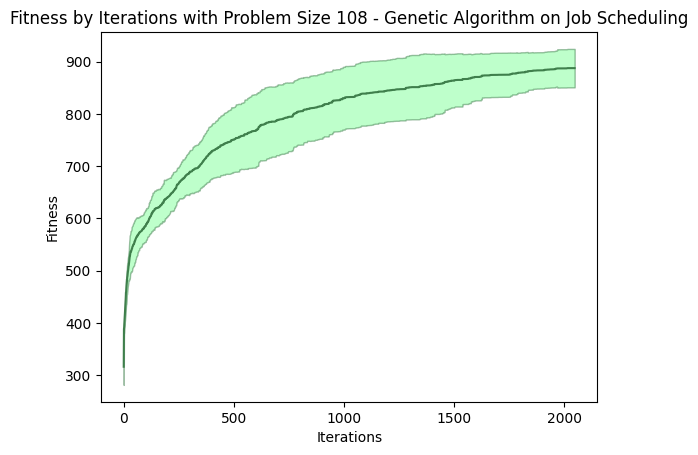

In [63]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [11]:
# elbow analysis
#from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

31


In [14]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == kneedle.knee]

,Iteration,avg_fitness,var_fitness,stddev_fitness
31,31,536.5,1561.611111,39.517225


In [64]:
    df_fitness_iter_ffp.avg_fitness.max()

887.6666666666666

In [65]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

70.44114958996309

In [66]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(609    609
 610    610
 611    611
 Name: Iteration, dtype: int64,)

In [123]:
# Fevals - iteration

In [2]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [3]:
df_FEvals_iter_ffp.avg_FEvals.max()

2139.0

In [69]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [70]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.9,0.100000
2,2,3.2,0.400000
3,3,4.8,0.400000
4,4,6.3,0.233333


In [71]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [72]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 15.722948550164194)

In [73]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.9,0.100000,0.316228
2,2,3.2,0.400000,0.632456
3,3,4.8,0.400000,0.632456
4,4,6.3,0.233333,0.483046


Text(0, 0.5, 'FEvals')

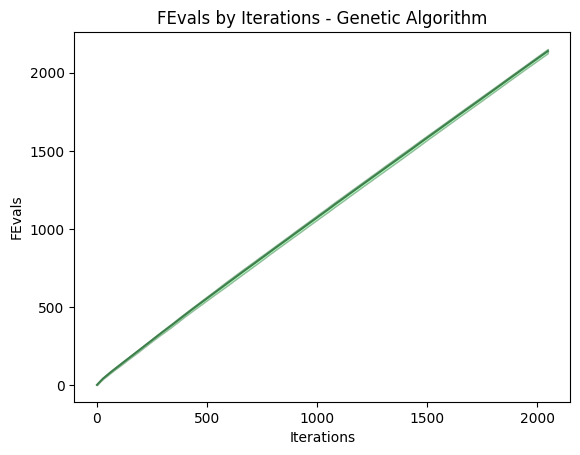

In [74]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [75]:
# fitness - wall clock time

In [76]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [77]:
df_time_iter_ffp.shape

(2049, 3)

In [78]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.003003,0.000002
1,1,0.013090,0.000044
2,2,0.023173,0.000131
3,3,0.032054,0.000148
4,4,0.038909,0.000171


In [79]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [80]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.003003,0.000002,0.001416
1,1,0.013090,0.000044,0.006616
2,2,0.023173,0.000131,0.011441
3,3,0.032054,0.000148,0.012163
4,4,0.038909,0.000171,0.013078


Text(0, 0.5, 'Time')

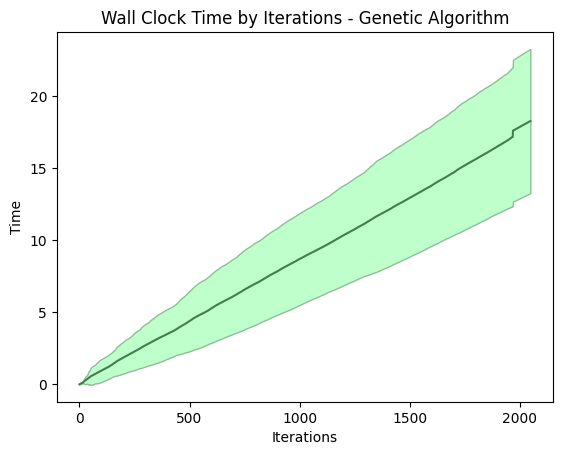

In [81]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [82]:
df_time_iter_ffp.stddev_time.max()

5.000240213263412

In [83]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64

In [84]:
df_time_iter_ffp.avg_time.max()

18.259382870669167

In [ ]:
# maybe look at how std dev decrease in bulks